In [139]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [140]:

# Use the raw GitHub URL for the heart dataset
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/heart.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [141]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [142]:
# 데이터와 타겟 분리
X = df.drop('target', axis=1).values
y = df['target'].values

In [143]:

Y = pd.get_dummies(y).values

In [144]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [147]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(10, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  
model.compile(optimizer=Adam(learning_rate=0.04), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                140       
                                                                 
 dense_41 (Dense)            (None, 8)                 88        
                                                                 
 dense_42 (Dense)            (None, 6)                 54        
                                                                 
 dense_43 (Dense)            (None, 2)                 14        
                                                                 
Total params: 296 (1.16 KB)
Trainable params: 296 (1.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


7/7 [==============================] - 4s 81ms/step - loss: 4.9200 - accuracy: 0.5300 - val_loss: 0.6891 - val_accuracy: 0.6000
Epoch 2/30
7/7 [==============================] - 0s 18ms/step - loss: 0.7032 - accuracy: 0.4424 - val_loss: 0.6964 - val_accuracy: 0.6000
Epoch 3/30
7/7 [==============================] - 0s 25ms/step - loss: 0.6996 - accuracy: 0.5207 - val_loss: 0.7009 - val_accuracy: 0.4000
Epoch 4/30
7/7 [==============================] - 0s 22ms/step - loss: 0.6948 - accuracy: 0.5576 - val_loss: 0.7074 - val_accuracy: 0.4000
Epoch 5/30
7/7 [==============================] - 0s 19ms/step - loss: 0.6898 - accuracy: 0.5576 - val_loss: 0.7122 - val_accuracy: 0.4000
Epoch 6/30
7/7 [==============================] - 0s 21ms/step - loss: 0.6876 - accuracy: 0.5576 - val_loss: 0.7190 - val_accuracy: 0.4000
Epoch 7/30
7/7 [==============================] - 0s 24ms/step - loss: 0.6867 - accuracy: 0.5576 - val_loss: 0.7239 - val_accuracy: 0.4000
Epoch 8/30
7/7 [======================

2/2 [==============================] - 0s 7ms/step


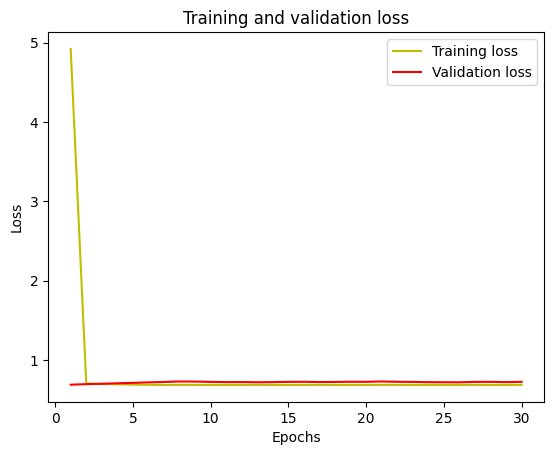

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

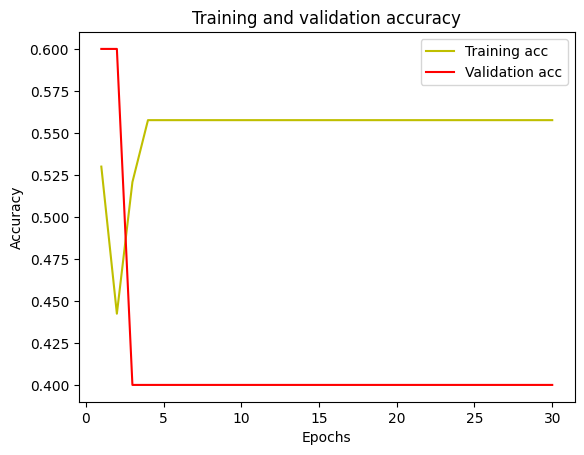

In [150]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [151]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.56      1.00      0.72        34

    accuracy                           0.56        61
   macro avg       0.28      0.50      0.36        61
weighted avg       0.31      0.56      0.40        61

[[ 0 27]
 [ 0 34]]
